In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from hpelm import ELM



2023-05-02 06:53:00.267320: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Load data from CSV file
data = pd.read_csv("Group_14_data_cleaned.csv")

# Split the data into training and testing sets
X = data.drop(["Auction_ID", 'Class', 'Bidder_ID'], axis=1)
y = data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state= 42)

# Convert input data to numpy arrays
X_train_np = X_train.values
y_train_np = y_train.values
X_test_np = X_test.values
y_test_np = y_test.values


# Best parameter training for each models (using the values from grid search cross validation)

In [3]:
# Best hyperparameters:  {'C': 1.0, 'gamma': 0.1, 'kernel': 'linear'}
# {'C': 9.087699346650997, 'gamma': 1.0163457603417565, 'kernel': 'rbf'
# Define the SVM model
svm_model = SVC(kernel='rbf', C=9.0877, gamma=1.016345)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
acc_svm = accuracy_score(y_test, y_pred_svm)

# Define the logistic regression model
lr_model = LogisticRegression(C=1, max_iter=200)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred_lr)

# Best hyperparameters:  
# {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
# Define the random forest model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=20, min_samples_split=5, min_samples_leaf=1)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)


# Define the KNN model
knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
acc_knn = accuracy_score(y_test, y_pred_knn)

## ELM
# Initialize the ELM model with the desired parameters
model = ELM(X_train.shape[1], 1, classification="c", batch=64, accelerator="cpu", precision="single")
model.add_neurons(128, "tanh")
# Train the model
model.train(X_train_np, y_train_np)

# Test the model
y_pred_ELM = model.predict(X_test_np)
y_pred_ELM = np.round(y_pred_ELM)
acc_ELM = accuracy_score(y_test_np, y_pred_ELM)

## Neural Network

# Define the neural network model
def create_model(num_layers=1, num_neurons=10):
    model = Sequential()
    model.add(Dense(num_neurons, input_dim=X_train.shape[1], activation='relu'))
    for i in range(num_layers):
        model.add(Dense(num_neurons, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
model = create_model(num_layers=2, num_neurons=64)
model.fit(X_train, y_train, epochs=50, verbose=2)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50, verbose=2)
# Use the trained classifier to predict the class labels for the test data
y_pred_nn = model.predict(X_test)
y_pred_nn = np.round(y_pred_nn)

acc_nn = accuracy_score(y_test, y_pred_nn)

/Users/Sravan/Applications/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
2023-05-02 06:53:06.849861: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/50
158/158 - 1s - loss: 0.2011 - accuracy: 0.9312 - 1s/epoch - 7ms/step
Epoch 2/50
158/158 - 0s - loss: 0.0450 - accuracy: 0.9792 - 298ms/epoch - 2ms/step
Epoch 3/50
158/158 - 0s - loss: 0.0415 - accuracy: 0.9820 - 289ms/epoch - 2ms/step
Epoch 4/50
158/158 - 0s - loss: 0.0400 - accuracy: 0.9816 - 278ms/epoch - 2ms/step
Epoch 5/50
158/158 - 0s - loss: 0.0392 - accuracy: 0.9826 - 279ms/epoch - 2ms/step
Epoch 6/50
158/158 - 0s - loss: 0.0370 - accuracy: 0.9844 - 288ms/epoch - 2ms/step
Epoch 7/50
158/158 - 0s - loss: 0.0337 - accuracy: 0.9867 - 285ms/epoch - 2ms/step
Epoch 8/50
158/158 - 0s - loss: 0.0304 - accuracy: 0.9881 - 282ms/epoch - 2ms/step
Epoch 9/50
158/158 - 0s - loss: 0.0288 - accuracy: 0.9911 - 278ms/epoch - 2ms/step
Epoch 10/50
158/158 - 0s - loss: 0.0243 - accuracy: 0.9905 - 249ms/epoch - 2ms/step
Epoch 11/50
158/158 - 0s - loss: 0.0221 - accuracy: 0.9919 - 303ms/epoch - 2ms/step
Epoch 12/50
158/158 - 0s - loss: 0.0179 - accuracy: 0.9937 - 303ms/epoch - 2ms/step
Epoc

Epoch 47/50
158/158 - 0s - loss: 2.0877e-05 - accuracy: 1.0000 - 200ms/epoch - 1ms/step
Epoch 48/50
158/158 - 0s - loss: 1.6849e-05 - accuracy: 1.0000 - 211ms/epoch - 1ms/step
Epoch 49/50
158/158 - 0s - loss: 1.5484e-05 - accuracy: 1.0000 - 227ms/epoch - 1ms/step
Epoch 50/50
158/158 - 0s - loss: 1.6590e-05 - accuracy: 1.0000 - 225ms/epoch - 1ms/step
40/40 [==============================] - 0s 1ms/step


In [4]:
# Use the best hyperparameters to create a new SVM model
# Best hyperparameters:  {'C': 18.52669390630025, 'gamma': 0.2563640674119393, 'kernel': 'rbf'}
best_svm_model = SVC(C=10, kernel="rbf", gamma=1)

# Train the new SVM model using the training data
best_svm_model.fit(X_train, y_train)

# Use the trained classifier to predict the class labels for the test data
y_pred = best_svm_model.predict(X_test)

# Evaluate the classifier's performance on the test data
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1122   11]
 [   1  131]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1133
           1       0.92      0.99      0.96       132

    accuracy                           0.99      1265
   macro avg       0.96      0.99      0.98      1265
weighted avg       0.99      0.99      0.99      1265



In [5]:

# Compare the accuracy of each model with the baseline model
print("Accuracy of SVM: {:.3f}".format(acc_svm))
print("Accuracy of logistic regression: {:.3f}".format(acc_lr))
print("Accuracy of random forest: {:.3f}".format(acc_rf))
print("Accuracy of KNN: {:.3f}".format(acc_knn))
print("Accuracy of ELM: {:.3f}".format(acc_ELM))
print("Accuracy of nn: {:.3f}".format(acc_nn))

Accuracy of SVM: 0.991
Accuracy of logistic regression: 0.975
Accuracy of random forest: 0.991
Accuracy of KNN: 0.986
Accuracy of ELM: 0.981
Accuracy of nn: 0.994


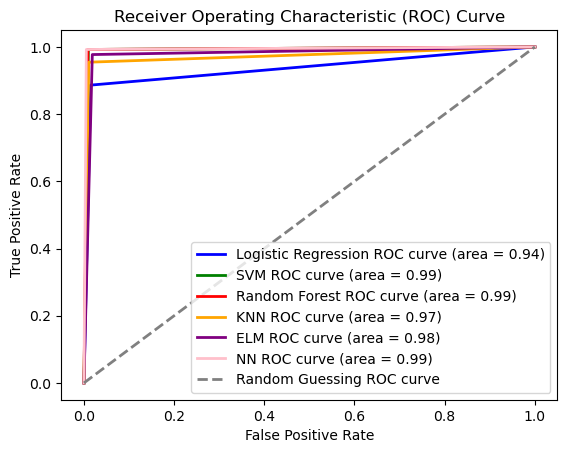

In [6]:
from sklearn.metrics import roc_curve, auc

# Calculate and plot ROC curve for logistic regression model
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label='Logistic Regression ROC curve (area = %0.2f)' % roc_auc_lr)

# Calculate and plot ROC curve for SVM model
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_pred_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)
plt.plot(fpr_svm, tpr_svm, color='green', lw=2, label='SVM ROC curve (area = %0.2f)' % roc_auc_svm)

# Calculate and plot ROC curve for random forest model
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.plot(fpr_rf, tpr_rf, color='red', lw=2, label='Random Forest ROC curve (area = %0.2f)' % roc_auc_rf)

# Calculate and plot ROC curve for KNN model
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)
plt.plot(fpr_knn, tpr_knn, color='orange', lw=2, label='KNN ROC curve (area = %0.2f)' % roc_auc_knn)

# Calculate and plot ROC curve for ELM model
fpr_elm, tpr_elm, thresholds_elm = roc_curve(y_test_np, y_pred_ELM)
roc_auc_elm = auc(fpr_elm, tpr_elm)
plt.plot(fpr_elm, tpr_elm, color='purple', lw=2, label='ELM ROC curve (area = %0.2f)' % roc_auc_elm)

# Calculate and plot ROC curve for neural network model
fpr_nn, tpr_nn, thresholds_nn = roc_curve(y_test, y_pred_nn)
roc_auc_nn = auc(fpr_nn, tpr_nn)
plt.plot(fpr_nn, tpr_nn, color='pink', lw=2, label='NN ROC curve (area = %0.2f)' % roc_auc_nn)

# Plot the ROC curve for random guessing (i.e., no skill)
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--', label='Random Guessing ROC curve')

# Set the plot title, axis labels, and legend
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


In [7]:
from sklearn.metrics import classification_report

# Generate the classification reports
svm_report = classification_report(y_test, y_pred_svm)
lr_report = classification_report(y_test, y_pred_lr)
rf_report = classification_report(y_test, y_pred_rf)
knn_report = classification_report(y_test, y_pred_knn)
ELM_report = classification_report(y_test_np, y_pred_ELM)
nn_report = classification_report(y_test, y_pred_nn)

# Print the classification reports
print("SVM Report:")
print(svm_report)
print("Logistic Regression Report:")
print(lr_report)
print("Random Forest Report:")
print(rf_report)
print("KNN Report:")
print(knn_report)
print("ELM Report:")
print(ELM_report)
print("NN Report:")
print(nn_report)


SVM Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1133
           1       0.92      0.99      0.96       132

    accuracy                           0.99      1265
   macro avg       0.96      0.99      0.98      1265
weighted avg       0.99      0.99      0.99      1265

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1133
           1       0.87      0.89      0.88       132

    accuracy                           0.97      1265
   macro avg       0.93      0.94      0.93      1265
weighted avg       0.97      0.97      0.97      1265

Random Forest Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1133
           1       0.93      0.99      0.96       132

    accuracy                           0.99      1265
   macro avg       0.96      0.99      0.98      1265
weighted avg